In [1]:
import pandas_profiling
import nltk
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sb
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings("ignore")
import unidecode
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.stem import PorterStemmer
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import matplotlib.animation as animation
import operator
import plotly.express as px
from collections import Counter
%matplotlib inline

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation

In [4]:
df.shape

(31962, 3)

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
#removing @
df['clean_tweet'] = df['tweet'].apply(lambda x : ' '.join([tweet for tweet in x.split()if not tweet.startswith("@")]))

In [7]:
df.head()

id  label                                              tweet  \
0   1      0   @user when a father is dysfunctional and is s...   
1   2      0  @user @user thanks for #lyft credit i can't us...   
2   3      0                                bihday your majesty   
3   4      0  #model   i love u take with u all the time in ...   
4   5      0             factsguide: society now    #motivation   

                                         clean_tweet  
0  when a father is dysfunctional and is so selfi...  
1  thanks for #lyft credit i can't use cause they...  
2                                bihday your majesty  
3  #model i love u take with u all the time in ur...  
4                factsguide: society now #motivation

In [8]:
#removing numbers
df['clean_tweet'] = df['clean_tweet'].apply(lambda x : ' '.join([tweet for tweet in x.split() if not tweet == '\d*']))

In [9]:
#Removing all the greek characters using unidecode library
df['clean_tweet'] = df['clean_tweet'].apply(lambda x : ' '.join([unidecode.unidecode(word) for word in x.split()]))

In [10]:
#Finding words with # attached to it
df['#'] = df['clean_tweet'].apply(lambda x : ' '.join([word for word in x.split() if word.startswith('#')]))
df.head()

id  label                                              tweet  \
0   1      0   @user when a father is dysfunctional and is s...   
1   2      0  @user @user thanks for #lyft credit i can't us...   
2   3      0                                bihday your majesty   
3   4      0  #model   i love u take with u all the time in ...   
4   5      0             factsguide: society now    #motivation   

                                         clean_tweet  \
0  when a father is dysfunctional and is so selfi...   
1  thanks for #lyft credit i can't use cause they...   
2                                bihday your majesty   
3  #model i love u take with u all the time in ur...   
4                factsguide: society now #motivation   

                                #  
0                            #run  
1  #lyft #disapointed #getthanked  
2                                  
3                          #model  
4                     #motivation

In [11]:
frame = df['#']


In [12]:
frame = pd.DataFrame(frame)
frame = frame.rename({'#':'Hash words'},axis = 'columns')
frame.head()


Hash words
0                            #run
1  #lyft #disapointed #getthanked
2                                
3                          #model
4                     #motivation

In [13]:
frame[frame['Hash words'] == ''] = 'No hashtags'
frame.head()

Hash words
0                            #run
1  #lyft #disapointed #getthanked
2                     No hashtags
3                          #model
4                     #motivation

In [14]:
data_frame = pd.concat([df,frame],axis = 1)

In [15]:
#Removing stopwords
data_frame['clean_tweet'] = data_frame['clean_tweet'].apply(lambda x : ' '.join([word for word in x.split() if not word in set(stopwords.words('english'))]))

In [16]:
data_frame.head()

id  label                                              tweet  \
0   1      0   @user when a father is dysfunctional and is s...   
1   2      0  @user @user thanks for #lyft credit i can't us...   
2   3      0                                bihday your majesty   
3   4      0  #model   i love u take with u all the time in ...   
4   5      0             factsguide: society now    #motivation   

                                         clean_tweet  \
0  father dysfunctional selfish drags kids dysfun...   
1  thanks #lyft credit can't use cause offer whee...   
2                                     bihday majesty   
3     #model love u take u time urd+-!!! dddd d|d|d|   
4                    factsguide: society #motivation   

                                #                      Hash words  
0                            #run                            #run  
1  #lyft #disapointed #getthanked  #lyft #disapointed #getthanked  
2                                                     No hashtags  
3                          #model                          #model  
4                     #motivation                     #motivation

In [17]:
#Lemmatization
lemmatizer = WordNetLemmatizer()
data_frame['clean_tweet'] = data_frame['clean_tweet'].apply(lambda x : ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

In [18]:
#Stemming
ps = PorterStemmer()
adwait = data_frame
#adwait.head()
data_frame['clean_tweet'] = data_frame['clean_tweet'].apply(lambda x : ' '.join([ps.stem(word) for word in x.split()]))

In [19]:
#Tokenization
corpus = []
for i in range(0,31962):
    tweet = data_frame['clean_tweet'][i]
    tweet = tweet.lower()
    tweet = tweet.split()
    tweet = [ps.stem(word) for word in tweet if not word in set(stopwords.words('english'))]
    tweet = ' '.join(tweet)
    corpus.append(tweet)

Normal words


(-0.5, 799.5, 499.5, -0.5)

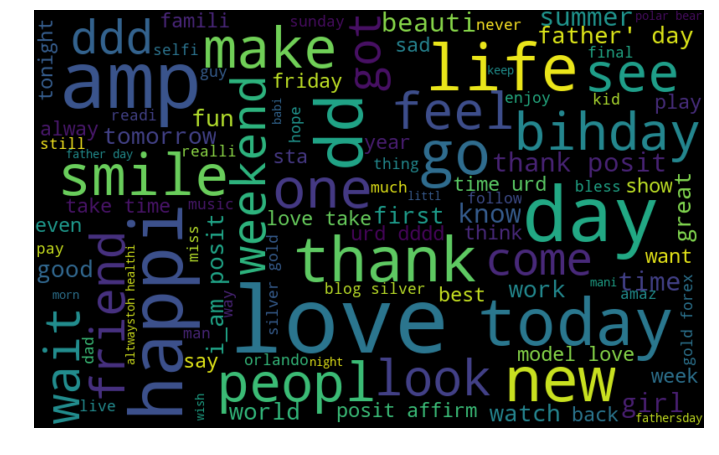

In [20]:
normal_words = ' '.join([word for word in data_frame['clean_tweet'][data_frame['label'] == 0]])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110,max_words = 100).generate(normal_words)
print('Normal words')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear',cmap='viridis')
plt.axis('off')

Normal words


(-0.5, 799.5, 499.5, -0.5)

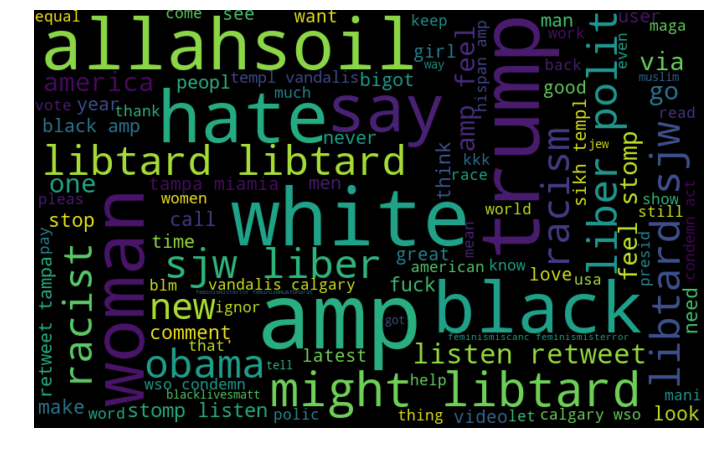

In [21]:
normal_words = ' '.join([word for word in data_frame['clean_tweet'][data_frame['label'] == 1]])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110,max_words = 100).generate(normal_words)
print('Normal words')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')

In [22]:
#Collecting positive hashtags

hash_positive = []
hash_negative = []

In [23]:
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [24]:
hash_positive = hashtag_extract(data_frame['clean_tweet'][data_frame['label'] == 0])

# extracting hashtags from racist/sexist tweets
hash_negative = hashtag_extract(data_frame['clean_tweet'][data_frame['label'] == 1])

# Converting a multidimensional list to a 1-D list
hash_positive = sum(hash_positive,[])
hash_negative = sum(hash_negative,[])

In [25]:
q = Counter(hash_positive)
q = dict(q.most_common())

In [26]:
l_positive_count = list(q.values())
l_positive_count[0:4]

[1579, 905, 636, 558]

In [27]:
r = Counter(hash_negative)
r = dict(r.most_common())
l_negative_count = list(r.values())
l_negative_count[0:4]

[133, 94, 92, 79]

In [28]:
l_positive_values = list(q.keys())
l_positive_values[0:4]

['love', 'posit', 'smile', 'healthi']

In [29]:
l_negative_values = list(r.keys())
l_negative_values[0:4]

['trump', 'polit', 'allahsoil', 'liber']

In [30]:
#Creating a dataframe to represent top 20 positive and negative hash words
l1 = pd.DataFrame(l_positive_values[0:20],columns = ['Positive_Words'])
l2 = pd.DataFrame(l_positive_count[0:20],columns = ['Positive_Count'])
l3 = pd.DataFrame(l_negative_values[0:20],columns = ['Negative_Words'])
l4 = pd.DataFrame(l_negative_count[0:20],columns = ['Negative_Count'])
z = pd.concat([l1,l2,l3,l4],axis = 1)


In [31]:
fig = px.bar(z, x="Positive_Words", y="Positive_Count",animation_frame="Positive_Count",
            hover_name="Positive_Words")
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1200
fig.show()

In [32]:
fig = px.bar(z, x="Negative_Words", y="Negative_Count",animation_frame="Negative_Count",
            hover_name="Negative_Words")
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1200
fig.show()

In [33]:

#Normal histogram of positive words
fig = px.bar(z, x="Positive_Words", y="Positive_Count",
            hover_name="Positive_Words",color = 'Positive_Count')
fig.show()

In [34]:
#Normal histogram of negative words
fig = px.bar(z, x="Negative_Words", y="Negative_Count",
            hover_name="Negative_Words",color= 'Negative_Count')
fig.show()

In [35]:

#Techniques to convert the tweets into Bag-of-Words, TF-IDF, and Word Embeddings
#Building various classifiers: -
#TF-IDF approach
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2,stop_words='english')
# TF-IDF feature matrix
X1 = tfidf_vectorizer.fit_transform(corpus).toarray()
Y1 = df.loc[:,'label'].values

In [36]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(data_frame['clean_tweet'], data_frame['label'], test_size = 0.3, random_state=0, shuffle = True, stratify=data_frame['label'])
vectorizer = TfidfVectorizer()
X1_train_vect = vectorizer.fit_transform(X1_train)
Y1 = df.loc[:,'label'].values

In [37]:
#Random Forest using pipelines
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
rf = Pipeline([('tfidf', TfidfVectorizer()), ('rf', RandomForestClassifier())])
rf.fit(X1_train, Y1_train)
y_pred = rf.predict(X1_test)
print(pd.crosstab(Y1_test,y_pred,rownames=['Actual'],colnames=['Predicted']))
print(classification_report(Y1_test, y_pred))

Predicted     0    1
Actual              
0          8878   38
1           370  303
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      8916
           1       0.89      0.45      0.60       673

   micro avg       0.96      0.96      0.96      9589
   macro avg       0.92      0.72      0.79      9589
weighted avg       0.95      0.96      0.95      9589



In [38]:
data_frame.head()

id  label                                              tweet  \
0   1      0   @user when a father is dysfunctional and is s...   
1   2      0  @user @user thanks for #lyft credit i can't us...   
2   3      0                                bihday your majesty   
3   4      0  #model   i love u take with u all the time in ...   
4   5      0             factsguide: society now    #motivation   

                                         clean_tweet  \
0  father dysfunct selfish drag kid dysfunction. ...   
1  thank #lyft credit can't use caus offer wheelc...   
2                                     bihday majesti   
3     #model love u take u time urd+-!!! dddd d|d|d|   
4                         factsguide: societi #motiv   

                                #                      Hash words  
0                            #run                            #run  
1  #lyft #disapointed #getthanked  #lyft #disapointed #getthanked  
2                                                     No hashtags  
3                          #model                          #model  
4                     #motivation                     #motivation

In [39]:
df = data_frame.drop(columns='Hash words')
df = df.drop(columns='tweet')
df.head()

id  label                                        clean_tweet  \
0   1      0  father dysfunct selfish drag kid dysfunction. ...   
1   2      0  thank #lyft credit can't use caus offer wheelc...   
2   3      0                                     bihday majesti   
3   4      0     #model love u take u time urd+-!!! dddd d|d|d|   
4   5      0                         factsguide: societi #motiv   

                                #  
0                            #run  
1  #lyft #disapointed #getthanked  
2                                  
3                          #model  
4                     #motivation

In [40]:
dff = df.drop(['label'], axis = 1)

In [41]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(dff, list(df.label), test_size=0.1)

In [42]:
X_test.shape

(3197, 3)

In [43]:
X_temp['label'] = y_temp
X_temp.head()

id                                        clean_tweet  \
17143  17144                  aunti mi home video abi real life   
18226  18227          make honey wine #peac #love #organ #vegan   
5900    5901  bird &amp; bad #piggi #finger famili \ #nurser...   
10128  10129  nice saddl - - #tagsforlik #love #instagood #t...   
4181    4182  #gameshow bull hill climb: reach target comple...   

                                                       #  label  
17143                                                         0  
18226                       #peace #love #organic #vegan      0  
5900                           #piggies #finger #nursery      0  
10128  #tagsforlikes #love #instagood #tbt #photoofth...      0  
4181                                           #gameshow      0

In [44]:
nonhate = X_temp[X_temp['label'] == 0]

In [45]:
hate = X_temp[X_temp.label == 1]

In [46]:
nonhatesample = nonhate.sample(n = hate.shape[0])

In [47]:
ds = pd.concat([hate, nonhatesample], axis = 0)

In [48]:
ds.to_csv("trainset.csv")

In [49]:
ds = pd.read_csv("trainset.csv")

In [50]:
ds_temp = ds
testdf = X_test
testdf['label'] = y_test
ds = pd.concat([ds_temp, testdf], axis = 0)
ds.head()

#  Unnamed: 0  \
0                          #hypocritea|      5105.0   
1                                   NaN     17137.0   
2  #allahsoil #bbc #msnbc #2017in3words     21550.0   
3           #trumpas #wellduh #sessions     22572.0   
4            #christmasadve #tupperwear     23322.0   

                                         clean_tweet     id  label  
0  say he' asham thing he' done continu make sham...   5106      1  
1                     pay porn free video joke woman  17138      1  
2  #allahsoil jews, christian muslim believ good ...  21551      1  
3  #trumpa pick attorney gener shadow race histor...  22573      1  
4  last retro #christmasadv year, whilst love goo...  23323      1

In [51]:
corpus = []
for i in range(ds.shape[0]):
    corpus.append(ds.iloc[i][2])

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [53]:
ds.head()

#  Unnamed: 0  \
0                          #hypocritea|      5105.0   
1                                   NaN     17137.0   
2  #allahsoil #bbc #msnbc #2017in3words     21550.0   
3           #trumpas #wellduh #sessions     22572.0   
4            #christmasadve #tupperwear     23322.0   

                                         clean_tweet     id  label  
0  say he' asham thing he' done continu make sham...   5106      1  
1                     pay porn free video joke woman  17138      1  
2  #allahsoil jews, christian muslim believ good ...  21551      1  
3  #trumpa pick attorney gener shadow race histor...  22573      1  
4  last retro #christmasadv year, whilst love goo...  23323      1

In [54]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names()
dense = X.todense()
denselist = dense.tolist()
df2 = pd.DataFrame(denselist, columns=feature_names)
df2

00  000  001   01   02   03  0345  039   05   06  ...  zongzi  \
0     0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...     0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...     0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...     0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...     0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...     0.0   
...   ...  ...  ...  ...  ...  ...   ...  ...  ...  ...  ...     ...   
7244  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...     0.0   
7245  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...     0.0   
7246  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...     0.0   
7247  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...     0.0   
7248  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...     0.0   

      zoomzoom  zootopia  zoro  zucchini  zulu  zuma  zurich  zuricha   zz  
0          0.0       0.0   0.0       0.0   0.0   0.0     0.0      0.0  0.0  
1          0.0       0.0   0.0       0.0   0.0   0.0     0.0      0.0  0.0  
2          0.0       0.0   0.0       0.0   0.0   0.0     0.0      0.0  0.0  
3          0.0       0.0   0.0       0.0   0.0   0.0     0.0      0.0  0.0  
4          0.0       0.0   0.0       0.0   0.0   0.0     0.0      0.0  0.0  
...        ...       ...   ...       ...   ...   ...     ...      ...  ...  
7244       0.0       0.0   0.0       0.0   0.0   0.0     0.0      0.0  0.0  
7245       0.0       0.0   0.0       0.0   0.0   0.0     0.0      0.0  0.0  
7246       0.0       0.0   0.0       0.0   0.0   0.0     0.0      0.0  0.0  
7247       0.0       0.0   0.0       0.0   0.0   0.0     0.0      0.0  0.0  
7248       0.0       0.0   0.0       0.0   0.0   0.0     0.0      0.0  0.0  

[7249 rows x 14559 columns]

In [55]:
tdf = df2
tdf['labelxyz'] = list(ds.label)
tdf_hate = tdf[tdf.labelxyz == 1]
tdf_nonhate = tdf[tdf.labelxyz == 0]
X_train_hate = tdf_hate.sample(frac=0.9, random_state=0)
X_test_hate = tdf_hate.drop(X_train_hate.index)
X_train_nonhate =  tdf_nonhate.sample(frac=0.406, random_state=0)
X_test_nonhate = tdf_nonhate.drop(X_train_nonhate.index)
X_train_df = pd.concat([X_train_hate, X_train_nonhate], axis = 0)
X_train = X_train_df.drop(['labelxyz'], axis = 1)
y_train = list(X_train_df.labelxyz)
X_test_df = pd.concat([X_test_hate, X_test_nonhate], axis = 0)
X_test = X_test_df.drop(['labelxyz'], axis = 1)
y_test = list(X_test_df.labelxyz)

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [58]:
# tfidf
# hybrid model 
# Use Cross-validation.
from sklearn.model_selection import cross_val_score

# Logistic Regression
log_reg = LogisticRegression()
log_scores = cross_val_score(log_reg, X_train, y_train, cv=2)
log_reg_mean = log_scores.mean()


# Naives Bayes
nav_clf = GaussianNB()
nav_scores = cross_val_score(nav_clf, X_train, y_train, cv=2)
nav_mean = nav_scores.mean()

#Random Forest
ran_for=RandomForestClassifier()
ran_scores = cross_val_score(ran_for, X_train, y_train, cv=2)
ran_mean = ran_scores.mean()

#Decision Tree
dt=DecisionTreeClassifier()
dt_scores = cross_val_score(dt, X_train, y_train, cv=2)
dt_mean = dt_scores.mean()

# Create a Dataframe with the results.
d = {'Classifiers': ['Logistic Reg.', 'Naives Bayes', 'Random Forest', 'Decision Tree'], 
    'Crossval Mean Scores': [log_reg_mean, nav_mean, ran_mean, dt_mean]}

result_df = pd.DataFrame(data=d)

hybrid_accuracy1 = (log_reg_mean+nav_mean+ran_mean+dt_mean)/4
hybrid_accuracy1


0.7926449672772476

In [92]:
from sklearn.metrics import accuracy_score
nav_clf = GaussianNB()
nav_clf.fit(X_train, y_train)
predict_nav = nav_clf.predict(X_test)
nb_val = accuracy_score(y_test, predict_nav)
nb_val

0.6257106759317751

In [93]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predict_nav)

array([[1777, 1165],
       [  20,  204]], dtype=int64)

In [94]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
predict_log = log_reg.predict(X_test)
lr_val = accuracy_score(y_test, predict_log)
lr_val

0.8720783322804802

In [95]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predict_log)

array([[2565,  377],
       [  28,  196]], dtype=int64)

In [96]:
log_reg.fit(X_train, y_train)
#predict_log = log_reg.predict(X_test, threshold = 0.4)
decisions = (log_reg.predict_proba(X_test) >= 0.5).astype(int)
#accuracy_score(y_test, predict_log)

In [97]:
tp = []
tn = []
overall_acc = []
for i in range(100):
    threshold = (i+1)/100
    decisions = (log_reg.predict_proba(X_test) >= threshold).astype(int)
    p = []
    for j in range(len(y_test)):
        p.append(1 - decisions[j][0])
    conf = confusion_matrix(y_test,p)
    tp.append(conf[0][0]/(conf[0][0] + conf[0][1]))
    tn.append(conf[1][1]/(conf[1][1] + conf[1][0]))
    overall_acc.append((conf[0][0] + conf[1][1])/len(y_test))

In [98]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
rand_clf = RandomForestClassifier()
rand_clf.fit(X_train, y_train)
predict = rand_clf.predict(X_test)
rf_val = accuracy_score(y_test, predict)
rf_val

0.8632343651295009

In [100]:
confusion_matrix(y_test, predict)

array([[2555,  387],
       [  46,  178]], dtype=int64)

In [101]:
from sklearn import tree
dt_clf = tree.DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
predict_dt = dt_clf.predict(X_test)
dt_val = accuracy_score(y_test, predict_dt)
dt_val

0.7820593809222994

In [102]:
confusion_matrix(y_test, predict_dt)

array([[2294,  648],
       [  42,  182]], dtype=int64)

In [103]:
from sklearn.ensemble import GradientBoostingClassifier
grad_clf = GradientBoostingClassifier()
grad_clf.fit(X_train, y_train)
predict_grad = grad_clf.predict(X_test)
grad_val = accuracy_score(y_test, predict_grad)
grad_val

0.8626026531901453

In [104]:
confusion_matrix(y_test, predict_grad)

array([[2568,  374],
       [  61,  163]], dtype=int64)

In [105]:
decisions = (log_reg.predict_proba(X_test) >= 0.5).astype(int)
p = []
for j in range(len(y_test)):
    p.append(1 - decisions[j][0])

In [106]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

print('Logistic Regression Score: ', lr_val)
print('Naive Bayes Score: ', nb_val)
print('Random Forest Score: ', rf_val)
print('Decision Tree Score: ', dt_val)
print('Grad Boosting Score: ', grad_val)

Logistic Regression Score:  0.8720783322804802
Naive Bayes Score:  0.6257106759317751
Random Forest Score:  0.8632343651295009
Decision Tree Score:  0.7820593809222994
Grad Boosting Score:  0.8626026531901453


In [107]:
from sklearn.metrics import roc_curve

log_fpr, log_tpr, threshold = roc_curve(y_test,p)
nav_fpr, nav_tpr, threshold = roc_curve(y_test, predict_nav)
rand_fpr, rand_tpr, thresold = roc_curve(y_test, predict)
dt_fpr, dt_tpr, threshold = roc_curve(y_test, predict_dt)
grad_fpr, grad_tpr, threshold = roc_curve(y_test, predict_grad)

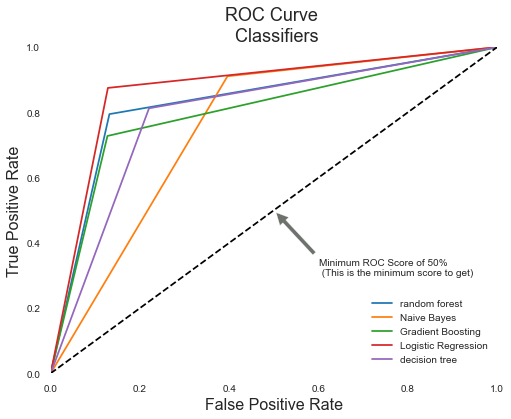

In [108]:
def graph_roc_curve_multiple(rand_fpr, rand_tpr, nav_fpr, nav_tpr,grad_fpr, grad_tpr, log_fpr, log_tpr, dt_fpr, dt_tpr):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve \n Classifiers', fontsize=18)
    plt.plot(rand_fpr, rand_tpr, label='random forest')
    plt.plot(nav_fpr, nav_tpr, label='Naive Bayes')
    plt.plot(grad_fpr, grad_tpr, label='Gradient Boosting')
    plt.plot(log_fpr, log_tpr, label='Logistic Regression')
    plt.plot(dt_fpr, dt_tpr, label='decision tree')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(rand_fpr, rand_tpr, nav_fpr, nav_tpr,grad_fpr, grad_tpr, log_fpr, log_tpr, dt_fpr, dt_tpr)
plt.show()

In [109]:

#bow with top n words

In [59]:

words = []
for k in range(len(corpus)):
    tweet_k = corpus[k].split(" ")
    for m in range(len(tweet_k)):
        words.append(tweet_k[m])

In [60]:
from collections import Counter

In [61]:
counter_obj = Counter(words)
top100 = counter_obj.most_common(1000)
top100words = []
for i in range(len(top100)):
    top100words.append(top100[i][0])

In [62]:
bow=df2
lst3 = [value for value in list(bow.columns) if value in top100words]

In [63]:
bow100 = bow[lst3]
bow100['labelxyz'] = list(ds.label)
bow_hate = bow100[bow100.labelxyz == 1]
bow_nonhate = bow100[bow100.labelxyz == 0]
X_train_hate = bow_hate.sample(frac=0.9, random_state=0)
X_test_hate = bow_hate.drop(X_train_hate.index)
X_train_nonhate =  bow_nonhate.sample(frac=0.406, random_state=0)
X_test_nonhate = bow_nonhate.drop(X_train_nonhate.index)
X_train_df = pd.concat([X_train_hate, X_train_nonhate], axis = 0)
X_train = X_train_df.drop(['labelxyz'], axis = 1)
y_train = list(X_train_df.labelxyz)
X_test_df = pd.concat([X_test_hate, X_test_nonhate], axis = 0)
X_test = X_test_df.drop(['labelxyz'], axis = 1)
y_test = list(X_test_df.labelxyz)

In [64]:
#bow
# hybrid model 
# Use Cross-validation.
from sklearn.model_selection import cross_val_score

# Logistic Regression
log_reg = LogisticRegression()
log_scores = cross_val_score(log_reg, X_train, y_train, cv=2)
log_reg_mean = log_scores.mean()


# Naives Bayes
nav_clf = GaussianNB()
nav_scores = cross_val_score(nav_clf, X_train, y_train, cv=2)
nav_mean = nav_scores.mean()

#Random Forest
ran_for=RandomForestClassifier()
ran_scores = cross_val_score(ran_for, X_train, y_train, cv=2)
ran_mean = ran_scores.mean()

#Decision Tree
dt=DecisionTreeClassifier()
dt_scores = cross_val_score(dt, X_train, y_train, cv=2)
dt_mean = dt_scores.mean()

# Create a Dataframe with the results.
d = {'Classifiers': ['Logistic Reg.', 'Naives Bayes', 'Random Forest', 'Decision Tree'], 
    'Crossval Mean Scores': [log_reg_mean, nav_mean, ran_mean, dt_mean]}

result_df = pd.DataFrame(data=d)

hybrid_accuracy2 = (log_reg_mean+nav_mean+ran_mean+dt_mean)/4
hybrid_accuracy2

0.764440574994211

In [116]:
#bigrams

In [117]:
import re

In [118]:
from nltk.util import ngrams

In [122]:
bigramList = []
for i in range(ds.shape[0]):
    s = ds.iloc[i][2]
    s = s.lower()
    s = re.sub(r'[^a-zA-Z0-9\s]', ' ', s)
    tokens = [token for token in s.split(" ") if token != ""]
    output = list(ngrams(tokens, 2))
    bigramList.append(output)

In [123]:
#bigramList[0] - first tweet bigrams
#len(bigramList[0])
actualBigramList = []
for i in range(len(bigramList)):
    #temp = []
    for j in range(len(bigramList[i])):
        actualBigramList.append(" ".join(bigramList[i][j]))
    #actualBigramList.append(temp)

In [124]:
uniqueBigramList = [] 
[uniqueBigramList.append(x) for x in actualBigramList if x not in uniqueBigramList] 
uniqueBigramList

['i thought',
 'thought alt',
 'alt right',
 'right secretli',
 'secretli meant',
 'meant white',
 'white nationalist',
 'nationalist altright',
 'altright maga',
 'trump new',
 'new york',
 'york co',
 'co chair',
 'chair won',
 'won t',
 't resign',
 'resign despit',
 'despit racist',
 'racist remark',
 'remark about',
 'about obama',
 'obama polit',
 'polit obama',
 'obama school',
 'you stupid',
 'stupid mf',
 'mf who',
 'who discredit',
 'discredit white',
 'white privilege',
 'privilege thi',
 'thi is',
 'is it',
 'it dummies',
 'dummies no',
 'no texa',
 'texa law',
 'law allow',
 'allow choke',
 'choke kids',
 'kids msnbc',
 'ag pick',
 'pick jeff',
 'jeff session',
 'session scrub',
 'scrub racism',
 'racism from',
 'from record',
 'record even',
 'even tho',
 'tho he',
 'he onc',
 'onc argu',
 'argu thi',
 'is a',
 'a feloni',
 'feloni trumpsamerica',
 'atk porn',
 'porn pic',
 'pic represent',
 'represent of',
 'of woman',
 'woman in',
 'in men',
 'men alcohol',
 'alcohol ad

In [125]:
tfidf2 = TfidfVectorizer(vocabulary = uniqueBigramList, ngram_range=(1,2))

In [126]:
tfs2 = tfidf2.fit_transform(corpus)

In [127]:
feature_names = tfidf2.get_feature_names()
dense = tfs2.todense()
denselist = dense.tolist()
df_bi = pd.DataFrame(denselist, columns=feature_names)

In [128]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_bi, list(ds.label), test_size=0.2)

In [130]:
#tfidf-bigram
# hybrid model 
# Use Cross-validation.
from sklearn.model_selection import cross_val_score

# Logistic Regression
log_reg = LogisticRegression()
log_scores = cross_val_score(log_reg, X_train2, y_train2, cv=2)
log_reg_mean = log_scores.mean()


# Naives Bayes
nav_clf = GaussianNB()
nav_scores = cross_val_score(nav_clf, X_train2, y_train2, cv=2)
nav_mean = nav_scores.mean()

#Random Forest
ran_for=RandomForestClassifier()
ran_scores = cross_val_score(ran_for, X_train2, y_train2, cv=2)
ran_mean = ran_scores.mean()

#Decision Tree
dt=DecisionTreeClassifier()
dt_scores = cross_val_score(dt, X_train2, y_train2, cv=2)
dt_mean = dt_scores.mean()

# Create a Dataframe with the results.
d = {'Classifiers': ['Logistic Reg.', 'Naives Bayes', 'Random Forest', 'Decision Tree'], 
    'Crossval Mean Scores': [log_reg_mean, nav_mean, ran_mean, dt_mean]}

result_df = pd.DataFrame(data=d)

hybrid_accuracy3 = (log_reg_mean+nav_mean+ran_mean+dt_mean)/4
hybrid_accuracy3

0.695955864642782

In [66]:
d={'Model':['tf-idf_hybrid','bow_hybrid','tf-idf+bigram_hybrid'],
   'Accuracy':[hybrid_accuracy1,hybrid_accuracy2,hybrid_accuracy3]}
result_df=pd.DataFrame(data=d)
result_df

Model  Accuracy
0         tf-idf_hybrid  0.792645
1            bow_hybrid  0.764441
2  tf-idf+bigram_hybrid  0.695956